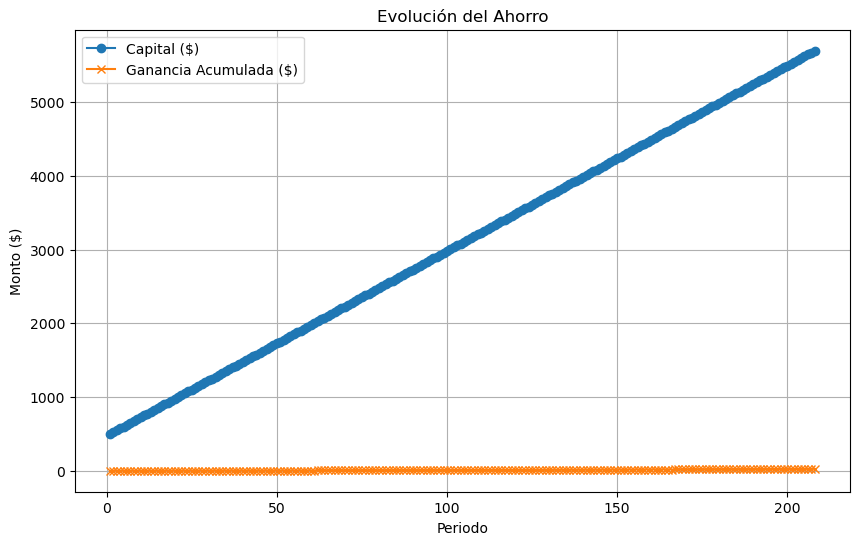

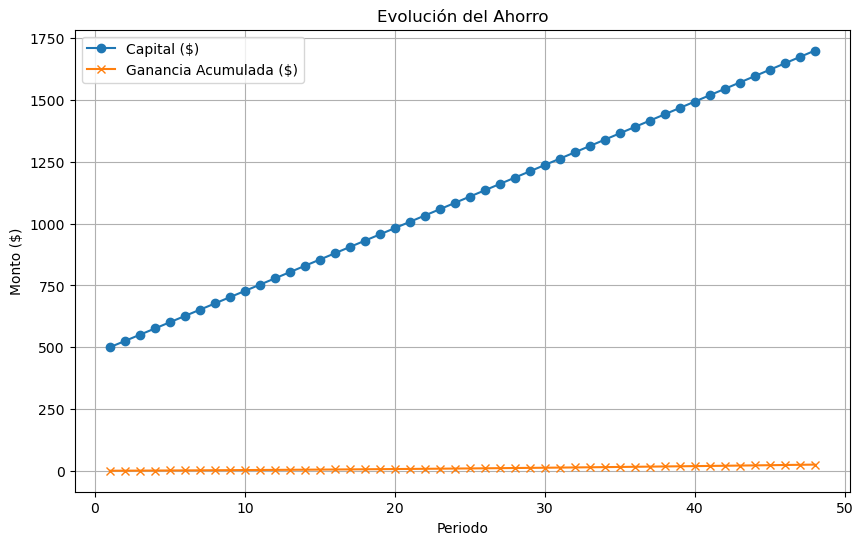

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from tkinter.scrolledtext import ScrolledText
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import newton

def calcular_tasa_requerida(deposito_inicial, aporte_periodico, frecuencia, anos, log):
    frecuencia_dict = {
        'semanal': 52,
        'mensual': 12,
        'bimestral': 6,
        'trimestral': 4
    }
    
    if frecuencia not in frecuencia_dict:
        raise ValueError("Frecuencia no válida. Use 'semanal', 'mensual', 'bimestral' o 'trimestral'.")
    
    periodos_por_ano = frecuencia_dict[frecuencia]
    num_periodos = anos * periodos_por_ano
    
    def ecuacion_tasa(tasa_periodica):
        capital = deposito_inicial
        for periodo in range(1, num_periodos + 1):
            if periodo > 1:
                capital += aporte_periodico
            interes = capital * (tasa_periodica / 100)
            capital += interes
        return capital - (deposito_inicial + aporte_periodico * num_periodos)

    tasa_periodica_inicial = 0.05  # valor inicial para la búsqueda de la tasa de interés
    tasa_periodica_optima = newton(ecuacion_tasa, tasa_periodica_inicial)
    
    tasa_anual = tasa_periodica_optima * periodos_por_ano

    # Log details of the calculation
    log.insert(tk.END, f"Frecuencia: {frecuencia}\n")
    log.insert(tk.END, f"Periodos por Año: {periodos_por_ano}\n")
    log.insert(tk.END, f"Tasa Periodica Inicial: {tasa_periodica_inicial:.5f}\n")
    log.insert(tk.END, f"Tasa Periodica Optima: {tasa_periodica_optima:.5f}\n")
    log.insert(tk.END, f"Tasa Anual Calculada: {tasa_anual:.2f}%\n")
    log.insert(tk.END, "-"*40 + "\n")

    return tasa_anual

def calcular_ahorro(deposito_inicial, aporte_periodico, frecuencia, tasa_anual, anos):
    frecuencia_dict = {
        'semanal': 52,
        'mensual': 12,
        'bimestral': 6,
        'trimestral': 4
    }
    
    if frecuencia not in frecuencia_dict:
        raise ValueError("Frecuencia no válida. Use 'semanal', 'mensual', 'bimestral' o 'trimestral'.")
    
    periodos_por_ano = frecuencia_dict[frecuencia]
    num_periodos = anos * periodos_por_ano
    tasa_periodica = tasa_anual / periodos_por_ano
    
    capital = deposito_inicial
    ganancia_acumulada = 0
    resultados = []
    
    for periodo in range(1, num_periodos + 1):
        if periodo > 1:
            capital += aporte_periodico
        interes = capital * (tasa_periodica / 100)
        ganancia_acumulada += interes
        capital += interes
        resultados.append((periodo, aporte_periodico if periodo > 1 else deposito_inicial, round(capital, 2), round(interes, 2), round(ganancia_acumulada, 2), round(capital, 2)))
    
    return resultados

def graficar_resultados(resultados):
    df = pd.DataFrame(resultados, columns=['Periodo', 'Aporte ($)', 'Capital ($)', 'Ganancia ($)', 'Ganancia Acumulada ($)', 'Total ($)'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['Periodo'], df['Capital ($)'], marker='o', label='Capital ($)')
    plt.plot(df['Periodo'], df['Ganancia Acumulada ($)'], marker='x', label='Ganancia Acumulada ($)')
    plt.xlabel('Periodo')
    plt.ylabel('Monto ($)')
    plt.title('Evolución del Ahorro')
    plt.legend()
    plt.grid(True)
    plt.show()

def calcular_y_mostrar():
    try:
        deposito_inicial = float(entry_deposito_inicial.get())
        aporte_periodico = float(entry_aporte_periodico.get())
        frecuencia = combo_frecuencia.get()
        anos = int(entry_anos.get())
        
        if deposito_inicial < 50:
            raise ValueError("El depósito inicial debe ser al menos 50 dólares.")
        if aporte_periodico < 5:
            raise ValueError("El aporte periódico debe ser al menos 5 dólares.")
        
        # Limpiar el log
        log.delete('1.0', tk.END)
        
        tasa_anual = calcular_tasa_requerida(deposito_inicial, aporte_periodico, frecuencia, anos, log)
        
        # Mostrar la tasa calculada en un mensaje
        messagebox.showinfo("Tasa de Interés Calculada", f"La tasa de interés anual requerida es: {tasa_anual:.2f}%")
        
        resultados = calcular_ahorro(deposito_inicial, aporte_periodico, frecuencia, tasa_anual, anos)
        
        # Limpiar la tabla anterior
        for item in tree.get_children():
            tree.delete(item)
        
        # Insertar nuevos datos en la tabla
        for row in resultados:
            tree.insert("", "end", values=row)
        
        # Graficar los resultados
        graficar_resultados(resultados)
        
    except ValueError as e:
        messagebox.showerror("Error", str(e))

# Crear la ventana principal
root = tk.Tk()
root.title("Calculadora de Ahorro")

# Crear y ubicar los widgets
tk.Label(root, text="Depósito Inicial ($):").grid(row=0, column=0, padx=10, pady=10)
entry_deposito_inicial = tk.Entry(root)
entry_deposito_inicial.grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="Aporte Periódico ($):").grid(row=1, column=0, padx=10, pady=10)
entry_aporte_periodico = tk.Entry(root)
entry_aporte_periodico.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Frecuencia:").grid(row=2, column=0, padx=10, pady=10)
combo_frecuencia = tk.StringVar(root)
combo_frecuencia.set("semanal") # valor por defecto
tk.OptionMenu(root, combo_frecuencia, "semanal", "mensual", "bimestral", "trimestral").grid(row=2, column=1, padx=10, pady=10)

tk.Label(root, text="Cantidad de Años:").grid(row=3, column=0, padx=10, pady=10)
entry_anos = tk.Entry(root)
entry_anos.grid(row=3, column=1, padx=10, pady=10)

tk.Button(root, text="Calcular y Mostrar", command=calcular_y_mostrar).grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# Crear la tabla para mostrar los resultados
columns = ("Periodo", "Aporte ($)", "Capital ($)", "Ganancia ($)", "Ganancia Acumulada ($)", "Total ($)")
tree = ttk.Treeview(root, columns=columns, show="headings")
tree.heading("Periodo", text="Periodo")
tree.heading("Aporte ($)", text="Aporte ($)")
tree.heading("Capital ($)", text="Capital ($)")
tree.heading("Ganancia ($)", text="Ganancia ($)")
tree.heading("Ganancia Acumulada ($)", text="Ganancia Acumulada ($)")
tree.heading("Total ($)", text="Total ($)")
tree.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

# Crear el cuadro de texto para mostrar el log de cálculo
log = ScrolledText(root, width=60, height=10)
log.grid(row=6, column=0, columnspan=2, padx=10, pady=10)

# Ejecutar la ventana principal
root.mainloop()
